In [0]:
!wget 'http://foodcam.mobi/dataset100.zip'
!unzip '/content/dataset100.zip'
!rm '/content/dataset100.zip'

In [0]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os

In [0]:
def LoadFoodData(folder_path, n_cls):
  targets = []
  images = []
  boxes, labels, image_id, iscrowd = [], [], [], []
  for i in tqdm(range(1, n_cls+1)):
    info = {}
    path = os.path.join(folder_path, str(i))
    file = open(path + '/bb_info.txt')
    txt = file.read()
    file.close()
    txt = txt.split('\n')
    # Making a dict of text file
    for j in txt[1:]:
      if len(j) > 0:
        temp = j.split(' ')
        info[temp[0]] = [int(x) for x in temp[1:]]
    # For loading images and targets
    for key in info:
      target = {}
      filename = os.path.join(path, key + '.jpg')
      img = cv2.imread(filename)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      y, x = img.shape[0], img.shape[1]
      img = cv2.resize(img, (224,224))

      x_scalar = 224/x
      y_scalar = 224/y
      x1 = int(info[key][0]*x_scalar)
      y1 = int(info[key][1]*y_scalar)
      x2 = int(info[key][2]*x_scalar)
      y2 = int(info[key][3]*y_scalar)
      poly = [x1, y1, x2, y2]
      area = (poly[0]-poly[2]) * (poly[1]-poly[3])
      poly = torch.tensor(poly)
      poly = torch.unsqueeze(poly, 0)

      target['boxes'] = poly
      target['labels'] = torch.tensor([int(i)])
      target['image_id'] = torch.tensor([int(key)])
      target['area'] = torch.tensor([area])
      target['iscrowd'] = torch.tensor([0])

      images.append(img)
      targets.append(target)

  return images, targets

In [3]:
images, targets = LoadFoodData('/content/UECFOOD100', 100)

100%|██████████| 100/100 [01:06<00:00,  1.51it/s]


In [0]:
classes = ['Background']
file = open('/content/UECFOOD100/category.txt')
cls = file.read()
file.close()
cls = cls.split('\n')
for i in cls[1:]:
  if (len(i) > 0):
    temp = i.split('\t')
    classes.append(' '.join(temp[1:]))

In [7]:
print('No. of images in dataset: {}\nNo. of classes in dataset: {}'.format(len(images), len(classes)-1))

No. of images in dataset: 14361
No. of classes in dataset: 100


In [0]:
def detection_box(images, targets):
  n = [134, 1143, 3567, 5887, 6785, 9954]

  for i in range(len(n)):
    plt.figure(figsize=(7,7))
    img = images[n[i]]
    tar = targets[n[i]]
    boxes, label = tar['boxes'][0].data, tar['labels'].data
    cv2.rectangle(img, (boxes[0], boxes[1]), (boxes[2], boxes[3]), color=(255,0,0), thickness=2)
    cv2.putText(img, classes[label], (boxes[0], boxes[1]), fontFace=cv2.FONT_HERSHEY_SIMPLEX, thickness=2, fontScale=0.7, color=(255,0,0))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()

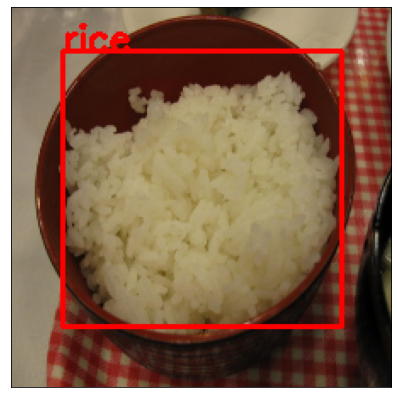

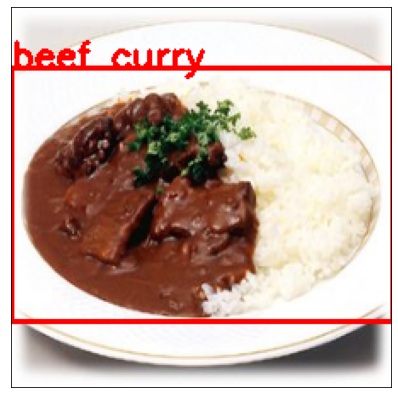

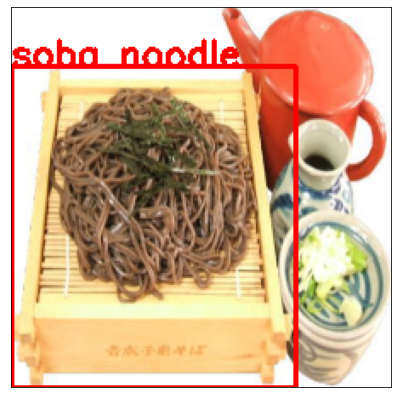

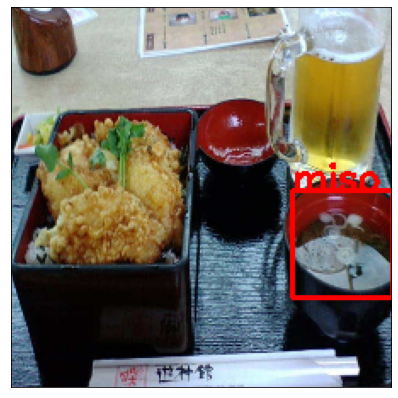

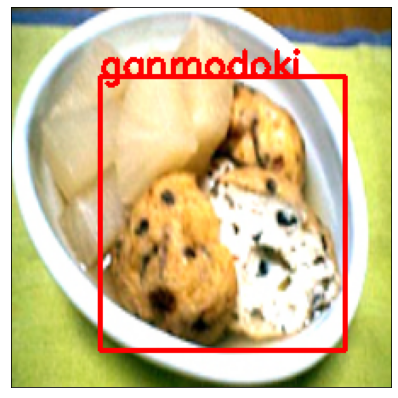

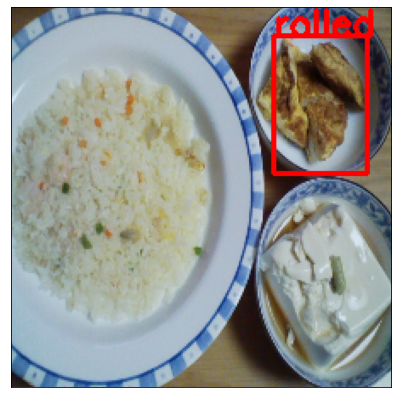

In [6]:
detection_box(images, targets)